<a href="https://colab.research.google.com/github/djb91/leetcode/blob/main/graph/lc_traversal_323_connectedComponents_gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeetCode 323. Number of Connected Components in an Undirected Graph

## Background
LeetCode has a [curated library of 45 graph problems](https://leetcode.com/studyplan/graph-theory/) that cover eight graph topics including `graph theory`, `Dijkstra's (pathfinding)`, and `traversals` among others. There are also essential graph problems throughout other popular lists.

## Problem
In this notebook we will analyze [Leetcode 323. Number of Connected Components in an Undirected Graph](https://leetcode.com/problems/number-of-connected-components-in-an-undirected-graph/description/).

 This problem is classified by LeetCode as:
* Topic: Graph
* Difficulty: Medium
* Tags: DFS, BFS, and Union Find

In addition to developing solution code, we will use Google Gemini to help us understand the problem and go beyond the code.



**[Follow me on LinkedIn](https://www.linkedin.com/in/danieljbukowski/) for daily content about graphs, data science, and GenAI**


## Instantiate Gemini using the Gemini API

In [1]:
import os
import tqdm as notebook_tqdm
import google.generativeai as genai

In [2]:
# import Gemini API and API key (Colab)
from google.colab import userdata
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

In [3]:
# # instantiate the LLM
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])
model = genai.GenerativeModel('gemini-1.5-pro-latest')


In [4]:
# to print markdown code
from IPython.display import display, Markdown

def print_md(string):
    display(Markdown(string))

In [5]:
# test model with a simple prompt
test_prompt = '''
I am a data scientist. Provide a oncise explanation
of what graph theory is and why it is an important
topic for data scientists to know.
'''

test_response = model.generate_content(test_prompt)
print_md(test_response.text)

## Graph Theory for Data Scientists: A Concise Explanation

**What is it?**

Graph theory is the mathematical study of **graphs**, which are structures used to model **relationships** between objects. A graph consists of **vertices** (nodes) connected by **edges** (links). 

**Why it matters for data scientists:**

* **Modeling relationships:** Data often involves interconnected entities (users, products, locations, etc.). Graphs naturally represent these relationships, revealing patterns and insights.
* **Network analysis:** Understand social networks, identify influencers, predict information flow, and optimize communication strategies.
* **Recommendation systems:**  Suggest relevant products, content, or connections based on user relationships and preferences.
* **Fraud detection:** Identify suspicious patterns and anomalies in financial transactions, social interactions, or other networks.
* **Optimization problems:**  Solve routing problems, resource allocation, and process optimization using graph algorithms.

**Examples in data science:**

* **Social network analysis:** Analyzing friendships on Facebook, follower networks on Twitter, or professional connections on LinkedIn.
* **Recommender systems:** Recommending products on Amazon based on purchase history or suggesting movies on Netflix based on viewing preferences.
* **Fraud detection:**  Identifying fraudulent credit card transactions based on unusual spending patterns or connections.

**In essence:** Graph theory provides powerful tools and algorithms to analyze relationships within data, leading to valuable insights and solutions across various data science domains. 


## LeetCode Problem Overview
First we will ask Gemini to provide an overview of [Leetcode 323. Number of Connected Components in an Undirected Graph](https://leetcode.com/problems/number-of-connected-components-in-an-undirected-graph/description/), but with a focus on identifying and explaining the graph theory concepts involved.

In [6]:
# instantiate Gemini for multi-turn chat with an empty history
chat = model.start_chat(history=[])

In [7]:
# set problem variable so we can re-use it if necessary
lc_problem = 'Leetcode 323. Number of Connected Components in an Undirected Graph.'

In [8]:
problem_prompt = f'''
You are a helpful assistant who is an expert in graph theory, graph algorithms
and solving LeetCode problems.

First, provide me with a detailed overview of {lc_problem}.

Next, classify the graph domain of this problem and provide an explanation of
why you categorized it in this way.

Do not provide a solution to the problem at this time. We will do that later.
Only return the overview, classification, and explanation.
'''

problem_response = chat.send_message(problem_prompt)

print_md(problem_response.text)

## LeetCode 323: Number of Connected Components in an Undirected Graph

**Problem Overview:**

You're given an undirected graph represented by an edge list. This means you're provided with:

*  `n`: The number of nodes (vertices) in the graph, labeled from `0` to `n - 1`.
*  `edges`: A list of edges, where each edge is represented as a pair `[a, b]`, indicating an undirected edge connecting nodes `a` and `b`.

The task is to determine the number of connected components in the given undirected graph. 

**Recall**:

* A **connected component** in an undirected graph is a subgraph where every pair of nodes is connected by a path, and no other nodes outside the subgraph are connected to any nodes within it.

**Example:**

```
Input: n = 5, edges = [[0, 1], [1, 2], [3, 4]]
Output: 2
Explanation: 
- Nodes 0, 1, and 2 form one connected component.
- Nodes 3 and 4 form another connected component. 
```

## Graph Domain Classification

This problem falls under the **Undirected Graph Traversal** domain. 

**Explanation:**

* **Undirected Graph:** The problem explicitly states that the input graph is undirected, meaning edges have no specific direction.
* **Traversal:**  To count connected components, you need to explore the graph.  Common traversal algorithms like Depth-First Search (DFS) or Breadth-First Search (BFS) can be used to identify all nodes reachable from a starting point, effectively outlining a single connected component. You would repeat the traversal process from unvisited nodes until all nodes are explored. 


In [9]:
prompt = '''
Next, I want you to identify each graph theory concept involved in {lc_problem}.
For each graph theory concept you identify,
provide a detailed explanation of that concept and how it relates to this problem.
Describe the practical applications of these graph theory
concepts as well.

Do not provide a solution to the problem at this time. We will do that later.
Only return the concepts and explanations.
'''

response = chat.send_message(prompt)

print_md(response.text)


Let's delve into the graph theory concepts underpinning LeetCode 323.

## Graph Theory Concepts in LeetCode 323

Here are the key graph theory concepts relevant to this problem:

1. **Undirected Graph:**

   - **Explanation:** An undirected graph is a set of nodes (vertices) connected by edges, where the edges have no specific direction. This means that if node A is connected to node B, you can traverse the edge from A to B or from B to A.

   - **Relevance to Problem:**  The problem statement explicitly mentions an "undirected graph."  This information is crucial as it dictates how you can traverse the graph to find connected components.

   - **Practical Applications:** Undirected graphs model relationships where direction doesn't matter, such as:
      -  **Social Networks:** Friendships are often mutual.
      -  **Molecule Structures:** Bonds between atoms don't have inherent direction. 
      -  **Computer Networks:** Connections between devices can be bidirectional.

2. **Connected Component:**

   - **Explanation:**  A connected component within an undirected graph is a subgraph where:
      - There exists a path between every pair of nodes in the subgraph.
      - No other nodes outside the subgraph are connected to nodes within it.

   - **Relevance to Problem:** The primary objective of LeetCode 323 is to determine the *number* of these distinct connected components within the given graph. 

   - **Practical Applications:** Identifying connected components is essential in:
      - **Social Network Analysis:** Finding groups of closely connected individuals.
      - **Image Segmentation:** Dividing an image into distinct regions based on pixel connectivity.
      - **Network Reliability:** Assessing how many independent paths exist between points in a network.

3. **Graph Traversal (DFS or BFS):**

   - **Explanation:** Graph traversal algorithms are methods for systematically visiting every node in a graph.  Two prominent algorithms are:
      - **Depth-First Search (DFS):**  Explores a graph by going as "deep" as possible along each branch before backtracking.
      - **Breadth-First Search (BFS):** Explores a graph level by level, visiting all neighbors of a node before moving to the next level.

   - **Relevance to Problem:** To count connected components, you use DFS or BFS to start from an arbitrary node and visit all reachable nodes. Each complete traversal from an unvisited node reveals one connected component.

   - **Practical Applications:**  Graph traversal is fundamental to:
      - **Finding shortest paths:** In GPS navigation or network routing. 
      - **Web Crawling:**  Exploring interconnected web pages.
      - **Solving puzzles:** Like mazes or finding solutions in a game tree. 


## Data Set
In this section we will have the model create at least one new data set we can use to test our solutions.

In [12]:
# these are the sample data sets provided in the LC problem
sample_data = '''
Example 1:
Input: n = 5, edges = [[0,1],[1,2],[3,4]]
Output: 2

Example 2:
Input: n = 5, edges = [[0,1],[1,2],[2,3],[3,4]]
Output: 1
'''

In [13]:
# these are the constraints provided in the problem
data_constraints = '''
1 <= n <= 2000
1 <= edges.length <= 5000
edges[i].length == 2
0 <= ai <= bi < n
ai != bi
There are no repeated edges.
'''

In [14]:
data_prompt = f'''
I want you to generate an accurate data set that
I can use to understand and practice solving {lc_problem}.

Return the data and variables that I will need along with
and explanation of both, in the context of the problem.

Include the accurate solution for the generated data set as well.
The data set must guaranteed that a unique solution exists.

The following data samples and constraints are provided in the problem description.
Use both as guides for generating the data.
Samples:
{sample_data}

Ensure the generated data meets the following constraints:
{data_constraints}

After you generate sample data, confirm that it does not duplicate the
sample data and that it meets the requirements and constraints.
'''

data_response = chat.send_message(data_prompt)

print_md(data_response.text)

Here's a generated data set for practicing LeetCode 323:

```python
n = 10  # Number of nodes
edges = [[1, 2], [2, 3], [4, 5], [5, 6], [7, 8], [0, 9]]
```

**Explanation:**

* **`n` (`int`):** Represents the number of nodes in our graph, labeled from `0` to `n-1`. Here, we have 10 nodes.
* **`edges` (`List[List[int]]`):** A list of pairs, with each pair representing an undirected edge between two nodes. For instance, `[1, 2]` means there's an edge connecting node `1` and node `2`.

**Visualization:**

It's helpful to visualize this graph:

```
0---9   1---2---3   4---5---6   7---8
```

As you can see, we have 4 distinct connected components:

1. Nodes `0` and `9` are connected.
2. Nodes `1`, `2`, and `3` form a connected component.
3. Nodes `4`, `5`, and `6` make up another component. 
4. Nodes `7` and `8` are connected.

**Solution for the Generated Data:**

Therefore, the correct output (number of connected components) for this data set is **4**.

**Data Confirmation:**

* **Uniqueness:** This data set is different from the examples provided in the problem description. 
* **Constraints:**
   * `1 <= n = 10 <= 2000` (Satisfied)
   * `1 <= edges.length = 6 <= 5000` (Satisfied)
   * All edges have a length of 2 (pairs).
   * Node values are within the range `[0, n-1]`.
   * There are no self-loops (`ai != bi`).
   * There are no repeated edges. 


In [15]:
# extract variable, data, and solution
n = 10  # Number of nodes
edges = [[1, 2], [2, 3], [4, 5], [5, 6], [7, 8], [0, 9]]
solution = 4

## Data Visualization
Data visualization is critical for exploring data, especially graph data. We will use NetworkX to quickly plot our new data.

In [16]:
# !pip install networkx --upgrade --quiet
# !pip install matplotlib --upgrade --quiet

import networkx as nx
import matplotlib.pyplot as plt

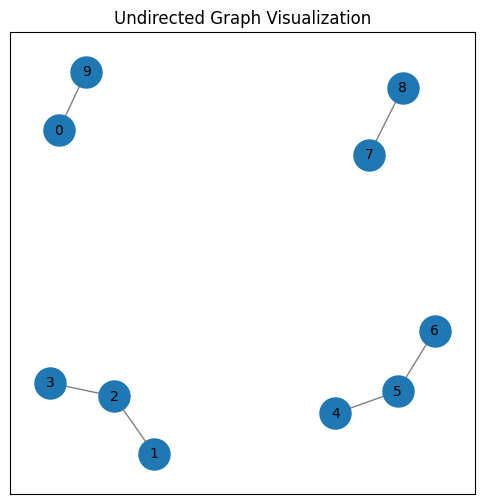

In [17]:
# Create the graph
G = nx.Graph()
G.add_nodes_from(range(n))
G.add_edges_from(edges)

# Visualization
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G, k=0.7)
nx.draw_networkx(G, pos,
                 with_labels=True,
                 node_size=500,
                 font_size=10,
                 edge_color='gray')
plt.title("Undirected Graph Visualization")
plt.show()

## Solution Code

In [18]:
solution_prompt = f'''
Now I want to begin developing a solution to {lc_problem}.
As a helpful coding assistant, explain the best conceptual approaches
to solving this problem. Include an analysis of complexity and runtime for
each approach. Do not provide code yet, only the conceptual steps and evaluation.
'''

solution_response = chat.send_message(solution_prompt)
print_md(solution_response.text)


Let's break down the best conceptual approaches for solving LeetCode 323.

## Conceptual Approaches

The core idea is to traverse the graph and, while doing so, efficiently count distinct connected components.  Here are the two most effective strategies:

**1. Depth-First Search (DFS)**

   **Steps:**

   1. **Initialization:**
      - Create an adjacency list `adj_list` to represent the graph.  This data structure efficiently stores which nodes are neighbors of each other.
      - Initialize a `visited` array (or set) to keep track of visited nodes during traversal. Initially, mark all nodes as not visited.
      - Set a counter variable `component_count` to 0.

   2. **Iterative DFS:** 
      - Iterate through each node in the graph.
      - For each node `i`, if it's not visited:
         - Increment `component_count`.
         - Perform DFS starting from node `i`:
            - Mark `i` as visited.
            - Explore all its unvisited neighbors recursively. Marking them visited as you go. This ensures that you don't count nodes in the same component multiple times.

   3. **Return:** Return `component_count`.

   **Complexity Analysis:**

   - **Time Complexity:**  O(V + E) where V is the number of vertices (nodes) and E is the number of edges.  We visit each node and edge at most once during DFS and adjacency list creation.
   - **Space Complexity:** O(V + E) 
      - Adjacency list: O(V + E) to store the graph structure.
      - `visited` array: O(V) to track visited nodes.
      - Recursion depth (implicit stack):  Can go up to O(V) in the worst case of a linear graph.

**2. Breadth-First Search (BFS)**

   **Steps:**

   -  The steps are very similar to DFS, but instead of using recursion, we employ a queue to process nodes level by level:

   1. **Initialization:** Same as DFS (adjacency list, `visited`, `component_count`).

   2. **Iterative BFS:**
      - Iterate through each node.
      - For each unvisited node `i`:
         - Increment `component_count`.
         - Initialize a queue and add `i` to it.
         - While the queue is not empty:
            - Dequeue a node.
            - Mark it as visited.
            - Enqueue all its unvisited neighbors.

   3. **Return:** Return `component_count`.

   **Complexity Analysis:**

   -  **Time Complexity:** O(V + E) - Same rationale as DFS.
   -  **Space Complexity:** O(V + E) 
      - Adjacency list: O(V + E).
      - `visited` array: O(V).
      - Queue: Can store up to O(V) nodes in the worst case of a very "wide" graph.

## Choosing Between DFS and BFS

- Both DFS and BFS are equally suitable for solving this problem and have the same time and space complexity in the context of connected components. 
- DFS might be slightly more intuitive to implement recursively for exploring connected structures, but the choice often comes down to personal preference. 


### DFS Approach
Of the two approaches provided, we will explore DFS because it is often used for identifying connected components in a graph.

In [19]:
solution_prompt = '''
Let's walk through solving this problem by using depth
first search. Walk me through the implementation steps using
Python. Provide a detailed explanation because I want to make sure I
understand the code for each step.Use the variables specified in the
Leetcode problem itself starting with "class Solution:".
'''

solution_response = chat.send_message(solution_prompt)
print_md(solution_response.text)

Here's a Python implementation of the Depth-First Search (DFS) approach for LeetCode 323, along with a step-by-step explanation:

```python
class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        # 1. Create Adjacency List
        adj_list = [[] for _ in range(n)] 
        for a, b in edges:
            adj_list[a].append(b)
            adj_list[b].append(a)

        # 2. Initialize Visited Array and Component Count
        visited = [False] * n
        component_count = 0

        # 3. DFS Function 
        def dfs(node):
            visited[node] = True 
            for neighbor in adj_list[node]:
                if not visited[neighbor]:
                    dfs(neighbor)

        # 4. Iterate and Perform DFS for each Component
        for i in range(n):
            if not visited[i]:
                component_count += 1
                dfs(i)

        return component_count 
```

**Explanation:**

1. **Create Adjacency List:**
   - `adj_list = [[] for _ in range(n)]`: We create an adjacency list `adj_list`, which will be a list of lists. Each index `i` in `adj_list` represents node `i`, and `adj_list[i]` will store a list of nodes directly connected to node `i`.
   - `for a, b in edges:`: We iterate through the given `edges` list.
   - `adj_list[a].append(b)` and `adj_list[b].append(a)`: For each edge `[a, b]`, we add `b` to the adjacency list of `a` and vice-versa since the graph is undirected.

2. **Initialize Visited Array and Component Count:**
   - `visited = [False] * n`: A boolean array `visited` is initialized with `False` for all nodes. This array tracks whether we've visited a node during our DFS traversal.
   - `component_count = 0`: We initialize a counter to keep track of the number of connected components found.

3. **DFS Function (`dfs(node)`):**
   - `visited[node] = True`: Mark the current `node` as visited as soon as we start exploring it.
   - `for neighbor in adj_list[node]:`: Iterate through the neighbors of the current `node` retrieved from the `adj_list`.
   - `if not visited[neighbor]:`: If a `neighbor` hasn't been visited yet:
      - `dfs(neighbor)`: Recursively call the `dfs` function on the unvisited `neighbor` to explore its connected component.

4. **Iterate and Perform DFS for Each Component:**
   - `for i in range(n):`: We loop through each node in the graph.
   - `if not visited[i]:`: If a node `i` hasn't been visited yet, it means it belongs to a new connected component:
      - `component_count += 1`: Increment the `component_count`.
      - `dfs(i)`: Start a DFS traversal from the current node `i` to explore and mark all nodes within its connected component.

5. **Return:** Finally, we return the `component_count`, which now represents the total number of connected components in the graph. 


In [28]:
# import typing for type hints
from typing import List

class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        # 1. Create Adjacency List
        adj_list = [[] for _ in range(n)]
        for a, b in edges:
            adj_list[a].append(b)
            adj_list[b].append(a)

        # 2. Initialize Visited Array and Component Count
        visited = [False] * n
        component_count = 0

        # 3. DFS Function
        def dfs(node):
            visited[node] = True
            for neighbor in adj_list[node]:
                if not visited[neighbor]:
                    dfs(neighbor)

        # 4. Iterate and Perform DFS for each Component
        for i in range(n):
            if not visited[i]:
                component_count += 1
                dfs(i)

        return component_count


### Test DFS Solution on Sample Data

In [29]:
# instantiate solution
sol = Solution()

# run function
answer = sol.countComponents(n=n, edges=edges)

# confirm result
print('Correct answer:', solution)
print('Function response:', answer)
assert solution == answer

Correct answer: 4
Function response: 4


### Union Find Approach
Another popular approach to solving this type of problem is the Union Find algorithm. In short, Union Find is designed for just this type of problem. Because Gemini did not mention it initally, we will prompt it for a description of this approach.

NeetCode usese this approach in [a YouTube explanation](https://www.youtube.com/watch?v=8f1XPm4WOUc) of this problem.

In [30]:
union_find_conceptual = f'''
I have heard another approach to solve {lc_problem}
is to use union find. Provide me with a conceptual
overview of the union find algorithm and how it
applies to this problem.
'''

union_find_response = chat.send_message(union_find_conceptual)

print_md(union_find_response.text)

You're right! Union Find, also known as the Disjoint Set Union (DSU), is another effective way to solve LeetCode 323. 

## Union Find Algorithm Overview

At its core, Union Find is a data structure and algorithm designed to:

1. **Maintain disjoint sets:**  It keeps track of groups of elements that are not connected to each other.
2. **Efficiently perform two operations:**
   - **Union:**  Merge two sets together.
   - **Find:**  Determine which set a particular element belongs to.

**How it works:**

* **Data Representation:** Typically, Union Find uses an array called `parent` (or sometimes `root`) to represent the sets.
   - Initially, each element `i` is its own parent (`parent[i] = i`), meaning each element is in its own set.
   - As we perform union operations, the `parent` array is updated to reflect the merging of sets.  
* **Find Operation:** To find the set of an element `i`, you follow the chain of parents from `i` until you reach a node that is its own parent (a root node). This root node represents the entire set.
* **Union Operation:** To merge the sets containing elements `a` and `b`, you:
   - Find the root of `a` (let's call it `root_a`).
   - Find the root of `b` (let's call it `root_b`).
   - If `root_a` is not equal to `root_b` (they are in different sets), set the parent of one root to be the other root. This effectively merges the two sets into one.

**Optimizations:**

* **Path Compression (Find Optimization):** During a `find` operation, after finding the root of an element, we update the parent of all elements along the path to point directly to the root. This flattens the tree structure and makes future `find` operations faster.
* **Union by Rank (Union Optimization):** We maintain a `rank` (or sometimes `size`) array, which keeps track of the approximate height or size of each set. When performing a union, we attach the smaller tree to the root of the larger tree. This helps keep the trees flatter and improves efficiency.

## Union Find for LeetCode 323

**How it Applies:**

1. **Initialization:** 
   - Create a `parent` array of size `n` (number of nodes). Initialize it so each node is its own parent.
   - Initialize a `count` variable to `n`, representing the initial number of connected components (each node starts as its own component). 

2. **Iterate through Edges:**
   - For each edge `[a, b]` in the `edges` list:
     - Use the `find` operation to find the root of `a` (`root_a`).
     - Use the `find` operation to find the root of `b` (`root_b`).
     - If `root_a` and `root_b` are different, perform a `union` operation to merge their sets. Decrement the `count` variable by 1, as we've merged two components into one.

3. **Return the Count:**
   - After processing all edges, the `count` variable will hold the number of connected components in the graph.

**Complexity Analysis:**

- **Time Complexity:** With both path compression and union by rank optimizations, the amortized time complexity for both `find` and `union` operations becomes nearly constant, close to O(1). Therefore, processing the edges takes approximately O(E).
- **Space Complexity:** O(N) for the `parent` array and potentially the `rank` array. 

Let me know if you'd like a Python implementation of the Union Find approach for this problem. 


In [32]:
union_find_code = f'''
Now generate the union find solution using Python.
Included detailed comments in the code. I want to make sure I
understand the code implementation for each step.
Use the variables specified in the Leetcode problem itself
beginning with "class Solution:".
'''

union_find_code_resp = chat.send_message(union_find_code)

print_md(union_find_code_resp.text)

```python
class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        """
        Counts the number of connected components in an undirected graph using Union Find.

        Args:
            n: The number of nodes in the graph, labeled from 0 to n - 1.
            edges: A list of edges, where each edge is a pair [a, b] representing 
                   an undirected edge connecting nodes a and b.

        Returns:
            The number of connected components in the graph.
        """

        parent = [i for i in range(n)]  # Initialize parent array - each node starts as its own parent
        count = n  # Initially, the number of components equals the number of nodes

        def find(x: int) -> int:
            """
            Finds the root (representative) of the set containing node x using path compression.

            Args:
                x: The node to find the root of.

            Returns:
                The root node of the set containing x.
            """

            if parent[x] != x:  # If x is not its own parent
                parent[x] = find(parent[x])  # Recursively find root and compress path by updating parent[x]
            return parent[x]  # Return the root

        def union(a: int, b: int) -> None:
            """
            Merges the sets containing nodes a and b if they are not already in the same set.

            Args:
                a: The first node.
                b: The second node.
            """
            nonlocal count  # Allow modification of the 'count' variable outside the function scope
            root_a = find(a)  # Find root of the set containing a
            root_b = find(b)  # Find root of the set containing b
            if root_a != root_b:  # If they are not in the same set
                parent[root_a] = root_b  # Merge sets by setting the parent of root_a to root_b
                count -= 1  # Decrement component count since two components have merged

        # Process each edge to merge components if necessary
        for a, b in edges: 
            union(a, b) 

        return count  # Return the final count of connected components
```

**Key Points:**

- **`parent` Array:** The `parent` array is the core of Union Find. It stores the parent (or representative) of each node in the disjoint set. 
- **Path Compression:** This optimization, implemented in the `find` function, dramatically improves efficiency by flattening the tree structure.
- **Union by Rank:** While this implementation doesn't explicitly use "rank," the choice of which root to attach to (`parent[root_a] = root_b`) could be further optimized with a rank-based heuristic.
- **Amortized Complexity:** With path compression, the `find` and `union` operations have nearly constant-time complexity (amortized over a series of operations). This makes Union Find very efficient for problems involving dynamic connectivity, like this one. 


In [33]:
class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        """
        Counts the number of connected components in an undirected graph using Union Find.

        Args:
            n: The number of nodes in the graph, labeled from 0 to n - 1.
            edges: A list of edges, where each edge is a pair [a, b] representing
                   an undirected edge connecting nodes a and b.

        Returns:
            The number of connected components in the graph.
        """

        parent = [i for i in range(n)]  # Initialize parent array - each node starts as its own parent
        count = n  # Initially, the number of components equals the number of nodes

        def find(x: int) -> int:
            """
            Finds the root (representative) of the set containing node x using path compression.

            Args:
                x: The node to find the root of.

            Returns:
                The root node of the set containing x.
            """

            if parent[x] != x:  # If x is not its own parent
                parent[x] = find(parent[x])  # Recursively find root and compress path by updating parent[x]
            return parent[x]  # Return the root

        def union(a: int, b: int) -> None:
            """
            Merges the sets containing nodes a and b if they are not already in the same set.

            Args:
                a: The first node.
                b: The second node.
            """
            nonlocal count  # Allow modification of the 'count' variable outside the function scope
            root_a = find(a)  # Find root of the set containing a
            root_b = find(b)  # Find root of the set containing b
            if root_a != root_b:  # If they are not in the same set
                parent[root_a] = root_b  # Merge sets by setting the parent of root_a to root_b
                count -= 1  # Decrement component count since two components have merged

        # Process each edge to merge components if necessary
        for a, b in edges:
            union(a, b)

        return count  # Return the final count of connected components

### Test Union Find Solution on Sample Data

In [35]:
# instantiate solution
sol = Solution()

# run function
answer = sol.countComponents(n=n, edges=edges)

# confirm result
print('Correct answer:', solution)
print('Function response:', answer)
assert solution == answer

Correct answer: 4
Function response: 4


## Compare Solutions

In [36]:
compare_solutions = f'''
I want you to compare the DFS and Union Find
approaches to solveing {lc_problem}. Compare
them from a conceptual perspective as well as
runtime and complexity. Be thorough in your
analysis.
'''

compare_response = chat.send_message(compare_solutions)

print_md(compare_response.text)

Let's compare Depth-First Search (DFS) and Union Find for finding the number of connected components in an undirected graph:

## Conceptual Comparison

| Feature        | DFS                                                                      | Union Find                                                                               |
|----------------|--------------------------------------------------------------------------|-----------------------------------------------------------------------------------------|
| Core Idea      | Traverse the graph, visiting each node and its reachable neighbors to mark components.  | Represent components as disjoint sets and merge them as edges connect previously separate sets. |
| Data Structures| Adjacency list (to represent the graph), visited array (to track visited nodes). | Parent array (to represent disjoint sets), often with a rank/size array for optimization.     |
| Traversal     | Explicit traversal of the graph, either recursively or iteratively.       | No explicit traversal; edges guide set merging.                                             |

## Runtime and Complexity Analysis

| Aspect         | DFS                | Union Find (with path compression and union by rank) |
|----------------|---------------------|---------------------------------------------------------|
| Time Complexity | O(V + E)           | Nearly O(E) (amortized), often considered O(α(N) * E) where α(N) is the inverse Ackermann function (very slowly growing) |
| Space Complexity| O(V + E)           | O(V)                                                    |

**Detailed Breakdown:**

**Time Complexity:**

- **DFS:** O(V + E) because:
    - We visit each node at most once (O(V)).
    - We explore each edge at most twice (once from each direction, O(E)).
- **Union Find:** With path compression and union by rank optimizations:
    - The `find` and `union` operations have nearly constant amortized time complexity, close to O(1).
    - We perform `find` twice and potentially `union` once per edge, giving us close to O(E) overall.
    -  More rigorously, the time complexity is often expressed as O(α(N) * E), where α(N) is the inverse Ackermann function, which grows incredibly slowly and is effectively constant for practical graph sizes.

**Space Complexity:**

- **DFS:** O(V + E) due to:
    - Adjacency list: O(V + E) to store the graph structure.
    - `visited` array: O(V).
    - Recursion stack: Can reach a depth of O(V) in the worst-case (linear graph).
- **Union Find:** O(V) because:
    - `parent` array: O(V).
    - `rank` array (if used): O(V).

## Which One to Choose?

- **Performance:**  Union Find, with its near-constant-time operations, often outperforms DFS, especially for graphs with many edges (dense graphs) or for problems involving many connectivity queries.
- **Ease of Implementation:** DFS is often considered more intuitive to implement for basic graph traversal problems like this one. Union Find can be slightly trickier to grasp initially.
- **Problem Specifics:** If your problem involves frequent checks for connectivity between nodes or requires you to perform many union/merge operations, Union Find is a more natural and efficient choice. If you need to process the graph structure as you traverse it (e.g., finding paths, distances), DFS is generally preferred. 

**For LeetCode 323:** 
While both approaches can solve the problem, Union Find provides a slightly more efficient solution. However, if you're more comfortable with DFS, it's still a perfectly acceptable solution, and the difference in performance might not be noticeable for smaller graphs. 


## Conclusion
In this notebook we dug into Leetcode 323 and learned about the core concepts involved:
* Connected Components
* Depth-First Search
* Union Find

We also generated Python code to identify the connected components using both common approaches. We also saw how LLMs like Google Gemini can be powerful tools for learning concepts at the core of common LeetCode problems.


**[Follow me on LinkedIn](https://www.linkedin.com/in/danieljbukowski/) for daily content about graphs, data science, and GenAI**